In [1]:
# -*- coding: utf-8 -*-
# -*- author : Lokman Mheni - Fabio Palmisano -*-
# -*- date : 2024-04-20 -*-
# -*- Last revision: 2024-05-14 *-
# -*- python version : 3.11.9 -*-
# -*- Description: Notebook containing the project of NML 2024-*-

# <center> EE - 452: Network Machine Learning </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Bookreads recommenders </center>
---

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

#!pip install grakel
from grakel import GraphKernel
from grakel.utils import graph_from_networkx
from tqdm import tqdm

r = pd.read_csv( 'data/ratings.csv' )
tr = pd.read_csv( 'data/to_read.csv' )
b = pd.read_csv( 'data/books.csv' )

t = pd.read_csv( 'data/tags.csv' )
bt = pd.read_csv( 'data/book_tags.csv')

# Data Preprocessing

In [3]:
# Create an empty graph
#G = nx.Graph()

# Iterate over the 'tr' DataFrame and add edges between users who added the same book to 'to read'
#for _, row in tqdm(tr.iterrows(), total=len(tr)):
#    book_id = row['book_id']
#    user_id = row['user_id']
    
    # Get all users who added the same book to 'to read'
#    same_book_users = tr[tr['book_id'] == book_id]['user_id'].tolist()
    
    # Add edges between the current user and all other users who added the same book
#    for other_user in same_book_users:
#        if user_id != other_user:
#            G.add_edge(user_id, other_user)

# Plot the graph
#nx.draw(G, with_labels=True)

# Graph Creation

In [4]:
# Quickest 
# Sample because it's taking too long
r_sampled = r.sample(frac=0.01)
# Create a dictionary where the keys are book_ids and the values are sets of user_ids
book_users = defaultdict(set)

# Populate the dictionary
for _, row in tqdm(r_sampled.iterrows(), total=r_sampled.shape[0]):
    book_users[row['book_id']].add(row['user_id'])

# Create an empty graph
graph = nx.Graph()

# Iterate over each book
for book_id, users in tqdm(book_users.items(), total=len(book_users)):
    # Generate all pairs of users for this book
    user_pairs = combinations(users, 2)
    
    # Add edges between all pairs of users
    for user_pair in user_pairs:
        graph.add_edge(*user_pair)

# Print the number of nodes and edges in the graph
print(len(graph.nodes()))
print(len(graph.edges()))


100%|██████████| 8765/8765 [00:02<00:00, 3908.83it/s]

34887
989664


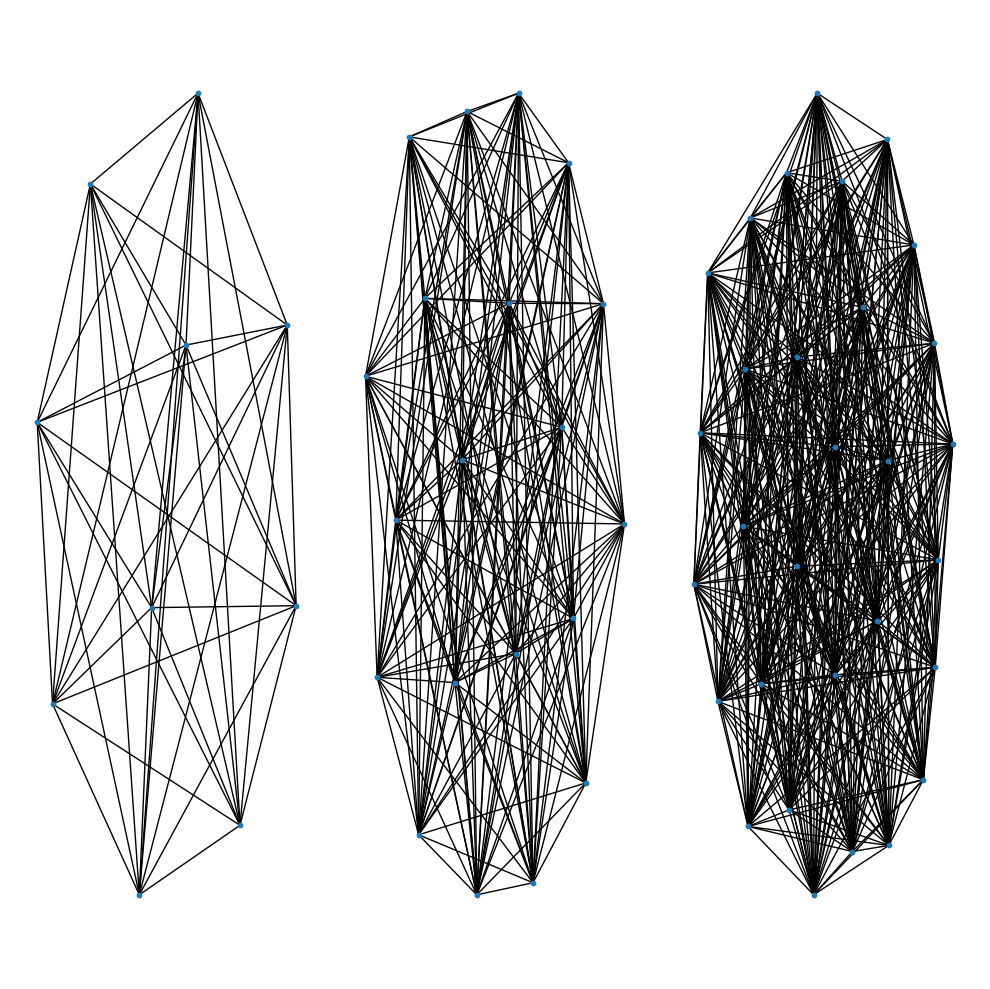

In [7]:
import matplotlib.pyplot as plt

# Set up the figure and the grid of subplots
plt.figure(figsize=(5, 5))


sampled_nodes = list(graph.nodes())[:10]

# Iterate over the first 9 subplots
for i in range(3):
    # Get the first 10 * (i + 1) nodes
    sampled_nodes = list(graph.nodes())[:10 * (i + 1)]
    
    # Create a subgraph with the sampled nodes
    sampled_graph = graph.subgraph(sampled_nodes)
    
    # Draw the subgraph
    plt.subplot(1, 3, i + 1)
    nx.draw(sampled_graph, with_labels=False, node_size=10)

plt.tight_layout()
plt.show()
